In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
import pickle


In [2]:
#Import data
wine_df = pd.read_csv('winemag.csv')
wine_df.head(5)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,NaN,NaN,Douro,Portugal,Quinta dos Avidagos
1,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,NaN,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
2,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,NaN,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,NaN,Michigan,US,St. Julian
3,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
4,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,Michael Schachner,@wineschach,15.0,Ars In Vitro,Tempranillo-Merlot,Navarra,NaN,Northern Spain,Spain,Tandem


/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


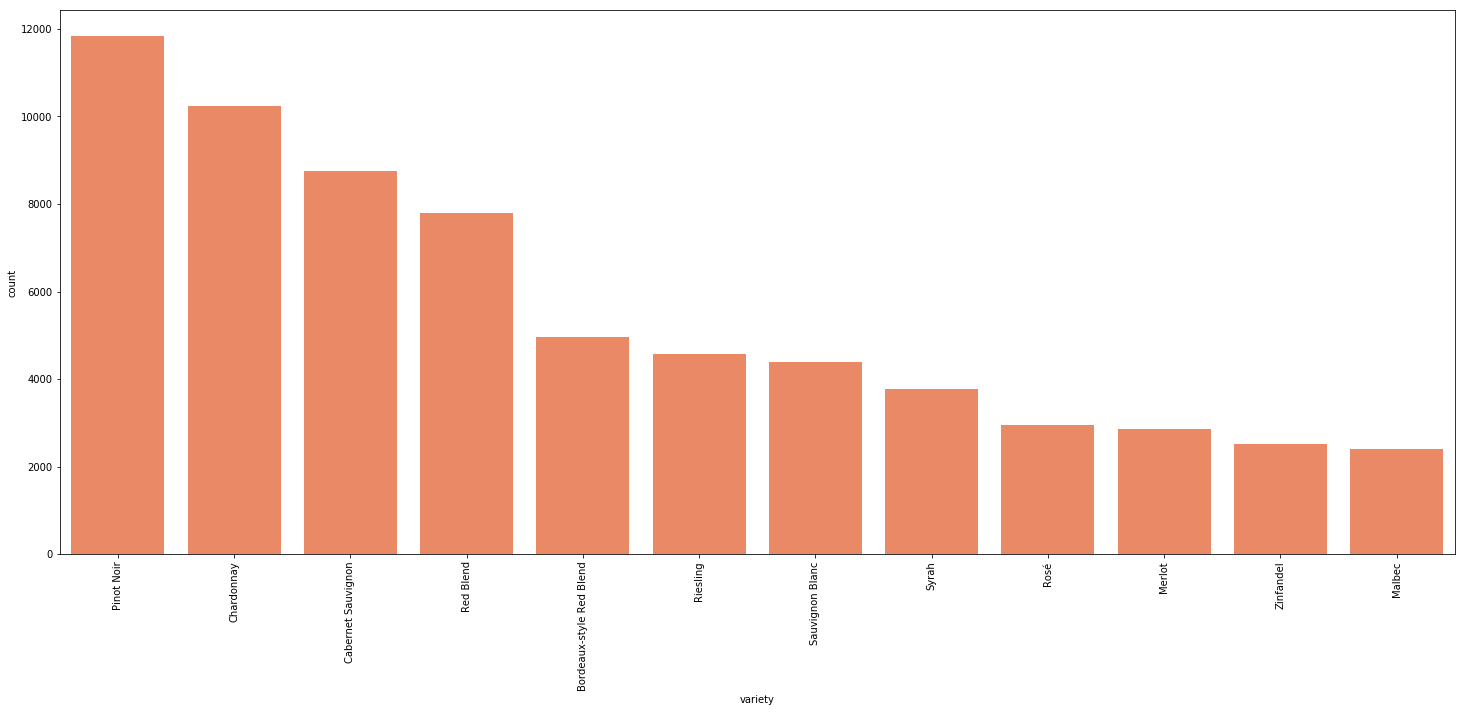

In [3]:
v_df = wine_df.groupby('variety').filter(lambda x: len(x) > 2200)
varieties = v_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = v_df['variety'], order = varieties, ax = ax, color = 'coral')
plt.xticks(rotation = 90)
plt.show()

In [5]:
filename = 'kmeansmodel13.pk'
with open(filename, 'rb') as fh:
   b = pickle.load(fh)

In [6]:
print(b)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [7]:
model = b
order_centroids= model.cluster_centers_.argsort()[:,::-1]
order_centroids

array([[  63140,  771415,  794100, ...,  875088,  875089, 1625964],
       [ 152543,  716181,  364591, ..., 1046816, 1046817,  812982],
       [ 129467,   72748, 1042997, ..., 1060821, 1060822,  812982],
       ..., 
       [ 585241,  584919,  172055, ..., 1062819, 1062821,  812982],
       [ 148222,   43039,  978412, ..., 1077683, 1077684,       0],
       [1566617,   26500,  557924, ..., 1060247, 1060248,  812982]])

In [8]:
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [13]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenizer2(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [14]:
filename = 'vectorizer13.pk'
with open(filename, 'rb') as fh:
   c = pickle.load(fh)

In [20]:
true_k = 12
vectorizer = c
terms=vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d" %i),
    for ind in order_centroids[i,:12]:
        print('%s'%terms[ind]),
    print
print("\n")
print("Prediction")
Y=vectorizer.transform(["merlot"])
prediction=model.predict(Y)
print(prediction)

Cluster 0
appl
lemon
lime
thi
palat
citru
peach
fresh
acid
riesl
dri
note
Cluster 1
blackberri
it'
currant
cherri
tannin
dri
sweet
thi
wine
oak
drink
rich
Cluster 2
berri
aroma
plum
herbal
feel
palat
thi
note
fruit
oak
berri aroma
spice
Cluster 3
cabernet
cabernet sauvignon
sauvignon
merlot
blend
franc
cabernet franc
petit
petit verdot
verdot
blend cabernet
merlot cabernet
Cluster 4
wine
fruiti
drink
acid
crisp
readi
readi drink
fruit
ha
thi
attract
ripe
Cluster 5
thi
fruit
wine
cherri
black
aroma
palat
tannin
red
spice
thi wine
show
Cluster 6
pinot
noir
pinot noir
cherri
raspberri
silki
cola
thi
it'
thi pinot
raspberri cherri
acid
Cluster 7
medium bodi
medium
bodi
thi medium bodi
thi medium
medium bodi wine
thi
bodi wine
wine
aroma
textur
cherri
Cluster 8
chardonnay
pineappl
butter
toast
butter toast
tropic
oak
vanilla
tropic fruit
acid
thi
sweet
Cluster 9
full bodi
full
bodi
wine
thi
thi full bodi
thi full
full bodi wine
ripe
bodi wine
textur
fruit
Cluster 10
black
alongsid
palat
tan

In [21]:
v_df['cluster'] = model.labels_

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
clusters = v_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Blues')

ax2.set_ylabel('K-Clusters', fontdict = {'size': 20})
ax2.set_xlabel('Wine Varieties', fontdict = {'size': 20})

for label in ax2.get_xticklabels():
    label.set_weight("bold")
    label.set_size(20)
for label in ax2.get_yticklabels():
    label.set_weight("bold")
    label.set_size(20)
        

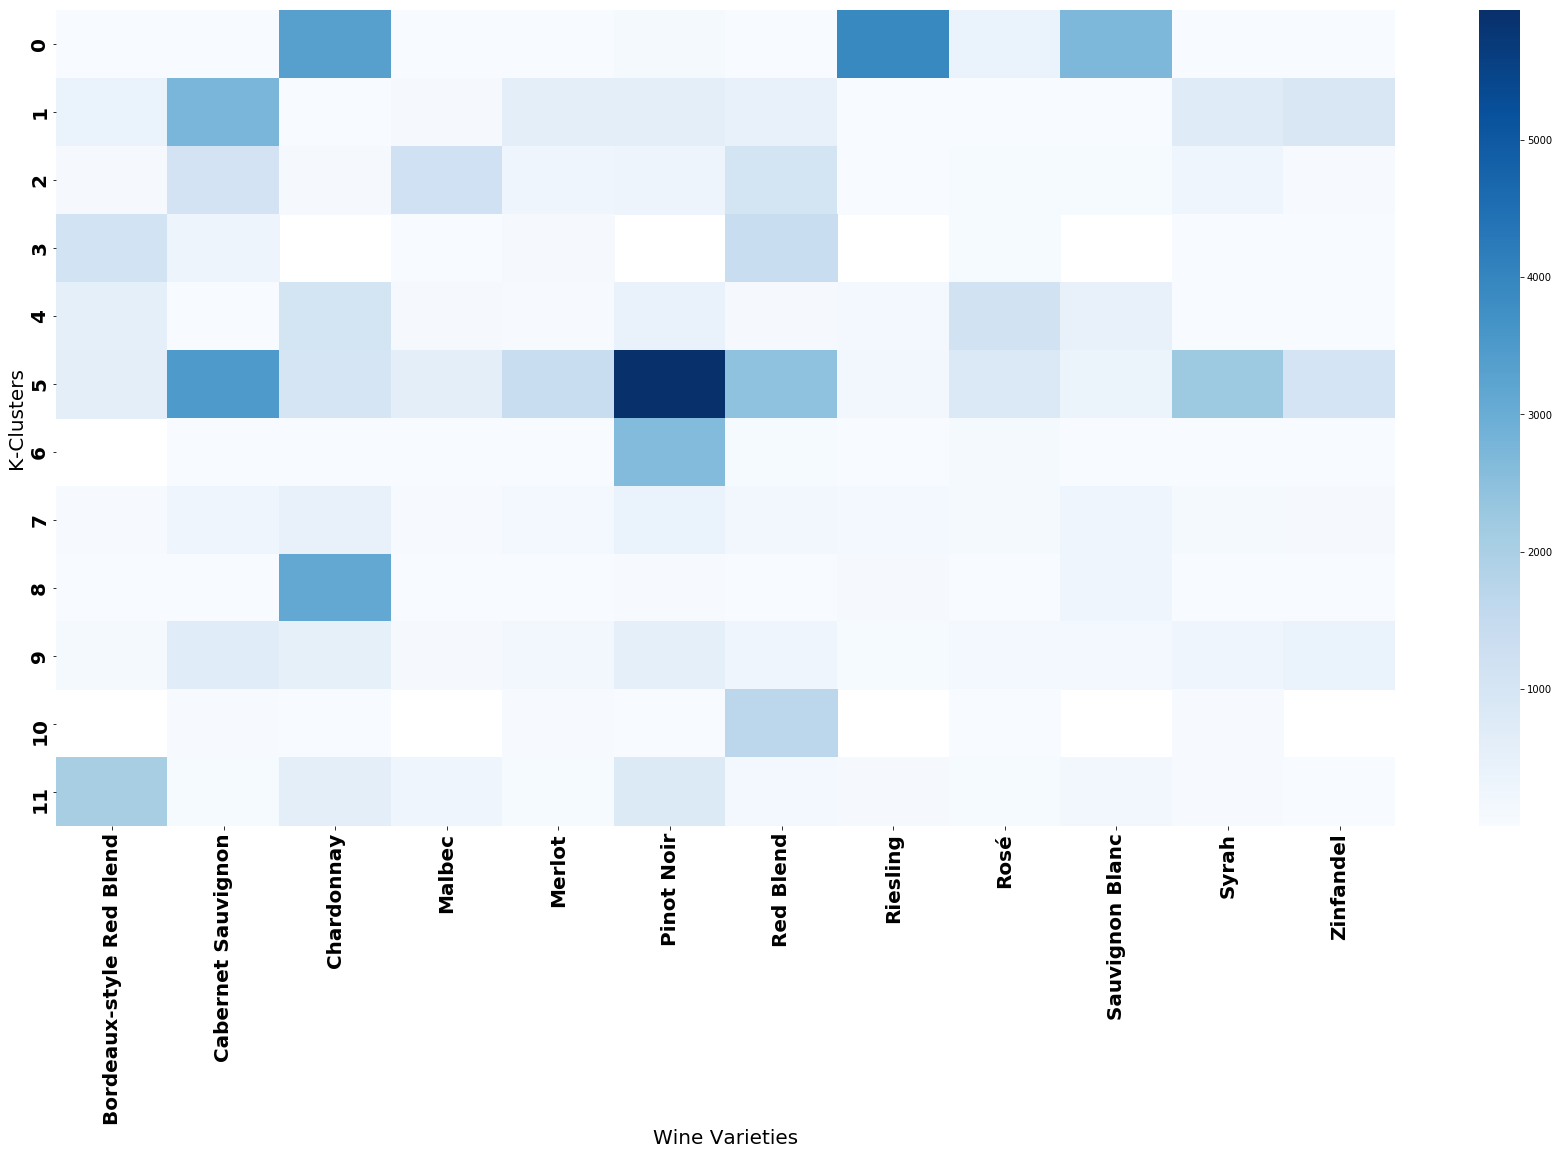

In [23]:
plt.show()